In [3]:
## Include mxnet path: you should include your mxnet local path, if mxnet path is global, 
## you don't need to include it.
import sys
sys.path.append('../../practice_demo')

import os
import mxnet as mx
import numpy as np
import copy
import re
from google.protobuf import text_format
import json
import cv2 as cv
import scipy
import PIL.Image
import math
import time
import scipy
import matplotlib
%matplotlib inline
import pylab as plt
from scipy.ndimage.filters import gaussian_filter
from generateLabelCPM import *

from collections import namedtuple
Point = namedtuple('Point', 'x y')
crop_size_x = 368
crop_size_y = 368
center_perterb_max = 40

#use_caffe = True
scale_prob = 1
scale_min = 0.5
scale_max = 1.1
target_dist = 0.6


## Load keypoint data

In [4]:
with open('pose_io/data.json', 'r') as f:
    datas = json.load(f)
keyss = datas.keys()

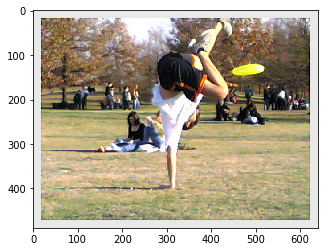

In [5]:
# read data
imgsequence = 50 ## image number
cimage = cv.imread(datas[keyss[imgsequence]]['img_paths'])
plt.imshow(cimage[:, :, [2, 1, 0]])

In [6]:
# image shape
cimage.shape

(489, 640, 3)

In [7]:
## object position

In [8]:
datas[keyss[imgsequence]]['objpos']

[197.415, 272.22]

## Generate heatmap, pagmap and mask

In [9]:
image, mask, heatmap, pagmap = getImageandLabel(datas[keyss[imgsequence]])

full mask


## Show heatmap

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


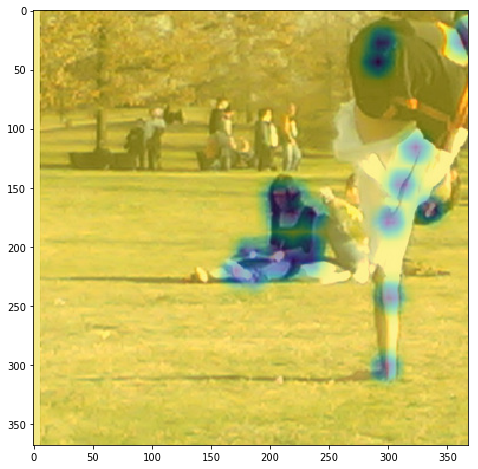

In [10]:
# part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, 
#             Lank, Leye, Reye, Lear, Rear, pt19]
heatmapScale = cv.resize(heatmap[18], (0, 0), fx=8, fy=8)

f = plt.figure(1)
plt.imshow(image[:,:,[2,1,0]])
ax2 = plt.imshow(heatmapScale, alpha=.5)
f.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)

## Show part affinity graph

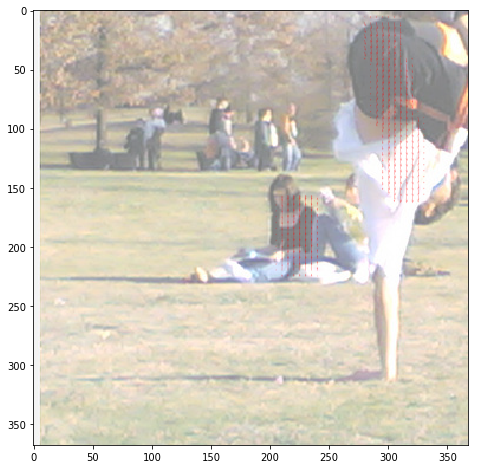

In [11]:
from numpy import ma

pagmapScale0 = cv.resize(pagmap[0], (0, 0), fx=8, fy=8)
pagmapScale1 = cv.resize(pagmap[1], (0, 0), fx=8, fy=8)
U = pagmapScale0 * -1
V = pagmapScale1
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.1*0.1] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

plt.figure()
plt.imshow(image[:,:,[2,1,0]], alpha = .5)
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)

## Show mask

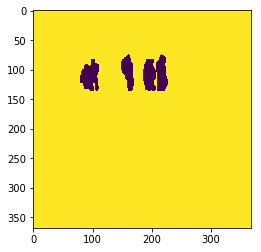

In [12]:
f = plt.figure(1)
#plt.imshow(image[:,:,[2,1,0]])
plt.imshow(mask[:,:,0])
f.show()